In [1]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
import matplotlib
import seaborn as sns

In [2]:
# ELPHI
df_transactions_ELPHI = pd.read_csv("C:/Users/felix.oechslein/Desktop/Daten, 13.12.22/Rohdaten/" +
                                    "ELPHI_transactions_ohne_vorname.csv")

df_history_ELPHI = pd.read_csv("C:/Users/felix.oechslein/Desktop/Daten, 13.12.22/Rohdaten/" +
                                    "ELPHI_history_ohne_vorname.csv")

C:\Users\felix.oechslein\AppData\Local\Temp\ipykernel_3644\3606709783.py:2: DtypeWarning: Columns (13,15,16,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df_transactions_ELPHI = pd.read_csv("C:/Users/felix.oechslein/Desktop/Daten, 13.12.22/Rohdaten/" +


In [3]:
# NRN
df_transactions_NRN = pd.read_csv("C:/Users/felix.oechslein/Desktop/Daten, 13.12.22/Rohdaten/" +
                                    "NRN_transactions_ohne_vorname.csv")

df_history_NRN = pd.read_csv("C:/Users/felix.oechslein/Desktop/Daten, 13.12.22/Rohdaten/" +
                                    "NRN_history_ohne_vorname.csv")

In [4]:
# ST
#df_transactions_ST = pd.read_csv("C:/Users/felix.oechslein/Desktop/Daten, 13.12.22/Rohdaten/" +
                                   #"ST_transactions_ohne_vorname.csv")

#df_history_ST = pd.read_csv("C:/Users/felix.oechslein/Desktop/Daten, 13.12.22/Rohdaten/" +
                                   #"ST_history_ohne_vorname.csv")
    
    # Error: Unable to allocate 1.00 MiB for an array with shape (131072,) and data type int64

### Schweiz Tourismus wird ignoriert, da
##### 1. Daten enthalten sehr geringe Zahlungen (0€ - 5€) und wahrscheinlich schlecht gepflegt
##### 2. sehr heterogene Produktpalette und Kundenprofile

In [5]:
# TBA
df_transactions_TBA = pd.read_csv("C:/Users/felix.oechslein/Desktop/Daten, 13.12.22/Rohdaten/" +
                                   "TBA_transactions_ohne_vorname.csv")

df_history_TBA = pd.read_csv("C:/Users/felix.oechslein/Desktop/Daten, 13.12.22/Rohdaten/" +
                                  "TBA_history_ohne_vorname.csv")

C:\Users\felix.oechslein\AppData\Local\Temp\ipykernel_3644\2783877804.py:2: DtypeWarning: Columns (5,7,8,13,14,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df_transactions_TBA = pd.read_csv("C:/Users/felix.oechslein/Desktop/Daten, 13.12.22/Rohdaten/" +


In [6]:
# Thalia
df_transactions_Thalia = pd.read_csv("C:/Users/felix.oechslein/Desktop/Daten, 13.12.22/Rohdaten/" +
                                    "Thalia_transactions_ohne_vorname.csv")

df_history_Thalia = pd.read_csv("C:/Users/felix.oechslein/Desktop/Daten, 13.12.22/Rohdaten/" +
                                    "Thalia_history_ohne_vorname.csv")

# 1. Creation/ createdprovider datum als Index verwenden

In [7]:
# ELPHI
df_trans_ELPHI = df_transactions_ELPHI
df_hist_ELPHI = df_history_ELPHI

#NRN
df_trans_NRN = df_transactions_NRN
df_hist_NRN = df_history_NRN

#Thalia
df_trans_Thalia = df_transactions_Thalia
df_hist_Thalia = df_history_Thalia

In [8]:
# TBA
df_trans_TBA = df_transactions_TBA
df_hist_TBA = df_history_TBA

In [9]:
df_trans_ELPHI["createdprovider"] = pd.to_datetime(df_trans_ELPHI['createdprovider'], format='%Y%m%d%H%M%S')
df_trans_ELPHI.set_index('createdprovider', inplace=True)

df_hist_ELPHI["creation"] = pd.to_datetime(df_hist_ELPHI['creation'], format='%Y%m%d%H%M%S')
df_hist_ELPHI.set_index('creation', inplace=True)

In [10]:
df_trans_NRN["createdprovider"] = pd.to_datetime(df_trans_NRN['createdprovider'], format='%Y%m%d%H%M%S')
df_trans_NRN.set_index('createdprovider', inplace=True)

df_hist_NRN["creation"] = pd.to_datetime(df_hist_NRN['creation'], format='%Y%m%d%H%M%S')
df_hist_NRN.set_index('creation', inplace=True)

In [11]:
df_trans_Thalia["createdprovider"] = pd.to_datetime(df_trans_Thalia['createdprovider'], format='%Y%m%d%H%M%S')
df_trans_Thalia.set_index('createdprovider', inplace=True)

df_hist_Thalia["creation"] = pd.to_datetime(df_hist_Thalia['creation'], format='%Y%m%d%H%M%S')
df_hist_Thalia.set_index('creation', inplace=True)

In [12]:
df_trans_TBA["createdprovider"] = pd.to_datetime(df_trans_TBA['createdprovider'], format='%Y%m%d%H%M%S')
df_trans_TBA.set_index('createdprovider', inplace=True)

df_hist_TBA["creation"] = pd.to_datetime(df_hist_TBA['creation'], format='%Y%m%d%H%M%S')
df_hist_TBA.set_index('creation', inplace=True)

# 2. Resamplen und mit agg("size") die Anzahl der Datenpunkte pro Monat ermitteln, danach in df umwandeln und index/ Spalten neu benennen

In [13]:
# ELPHI
df_trans_ELPHI_RESAMPLED = df_trans_ELPHI.resample('1M').agg('size')
df_trans_ELPHI_RESAMPLED = df_trans_ELPHI_RESAMPLED.to_frame(name = "Number of entries")
df_trans_ELPHI_RESAMPLED.index.names = ["Date"]

df_hist_ELPHI_RESAMPLED = df_hist_ELPHI.resample('1M').agg('size')
df_hist_ELPHI_RESAMPLED = df_hist_ELPHI_RESAMPLED.to_frame(name = "Number of entries")
df_hist_ELPHI_RESAMPLED.index.names = ["Date"]

# NRN
df_trans_NRN_RESAMPLED = df_trans_NRN.resample('1M').agg('size')
df_trans_NRN_RESAMPLED = df_trans_NRN_RESAMPLED.to_frame(name = "Number of entries")
df_trans_NRN_RESAMPLED.index.names = ["Date"]

df_hist_NRN_RESAMPLED = df_hist_NRN.resample('1M').agg('size')
df_hist_NRN_RESAMPLED = df_hist_NRN_RESAMPLED.to_frame(name = "Number of entries")
df_hist_NRN_RESAMPLED.index.names = ["Date"]

# Thalia
df_trans_Thalia_RESAMPLED = df_trans_Thalia.resample('1M').agg('size')
df_trans_Thalia_RESAMPLED = df_trans_Thalia_RESAMPLED.to_frame(name = "Number of entries")
df_trans_Thalia_RESAMPLED.index.names = ["Date"]

df_hist_Thalia_RESAMPLED = df_hist_Thalia.resample('1M').agg('size')
df_hist_Thalia_RESAMPLED = df_hist_Thalia_RESAMPLED.to_frame(name = "Number of entries")
df_hist_Thalia_RESAMPLED.index.names = ["Date"]

In [14]:
# TBA
df_trans_TBA_RESAMPLED = df_trans_TBA.resample('1M').agg('size')
df_trans_TBA_RESAMPLED = df_trans_TBA_RESAMPLED.to_frame(name = "Number of entries")
df_trans_TBA_RESAMPLED.index.names = ["Date"]

df_hist_TBA_RESAMPLED = df_hist_TBA.resample('1M').agg('size')
df_hist_TBA_RESAMPLED = df_hist_TBA_RESAMPLED.to_frame(name = "Number of entries")
df_hist_TBA_RESAMPLED.index.names = ["Date"]

# 3. Plot the data

In [15]:
matplotlib.rcParams.update({'figure.autolayout': True})

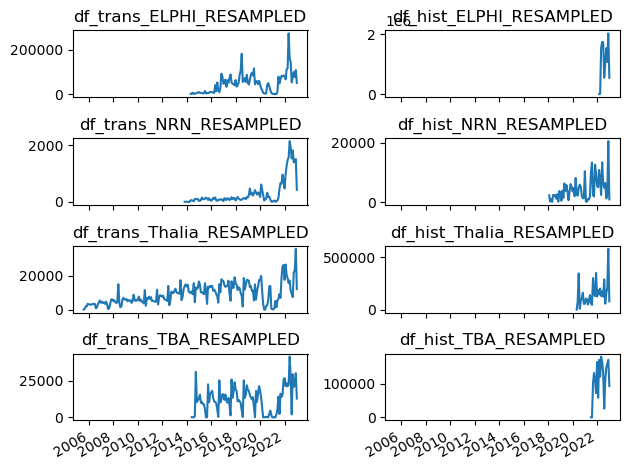

In [16]:
fig, ((ax0, ax1), (ax2, ax3), (ax4, ax5), (ax6, ax7)) = plt.subplots(nrows=4, ncols=2, sharex = True)

ax0.plot(df_trans_ELPHI_RESAMPLED)
ax0.set_title('df_trans_ELPHI_RESAMPLED')

ax1.plot(df_hist_ELPHI_RESAMPLED)
ax1.set_title('df_hist_ELPHI_RESAMPLED')

ax2.plot(df_trans_NRN_RESAMPLED)
ax2.set_title('df_trans_NRN_RESAMPLED')

ax3.plot(df_hist_NRN_RESAMPLED)
ax3.set_title('df_hist_NRN_RESAMPLED')

ax4.plot(df_trans_Thalia_RESAMPLED)
ax4.set_title('df_trans_Thalia_RESAMPLED')

ax5.plot(df_hist_Thalia_RESAMPLED)
ax5.set_title('df_hist_Thalia_RESAMPLED')

ax6.plot(df_trans_TBA_RESAMPLED)
ax6.set_title('df_trans_TBA_RESAMPLED')

ax7.plot(df_hist_TBA_RESAMPLED)
ax7.set_title('df_hist_TBA_RESAMPLED')

# beautify the x-labels
plt.gcf().autofmt_xdate()
#fig.tight_layout()

plt.show()